In [128]:
import numpy as np
import pandas as pd

In [129]:
data = pd.read_csv('synthetic_stroke_data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Female,80.3,0,0,Yes,Govt_job,Urban,170.38,18.4,Unknown,0
1,2,Female,89.4,0,0,Yes,Self-employed,Urban,186.89,19.6,formerly smoked,0
2,3,Male,87.5,0,0,Yes,Children,Urban,118.42,34.7,never smoked,0
3,4,Male,19.7,0,0,Yes,Private,Urban,226.01,27.1,smokes,0
4,5,Male,85.2,0,0,Yes,Children,Rural,229.64,27.6,Unknown,0


## Data Preprocessing

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50000 non-null  int64  
 1   gender             50000 non-null  object 
 2   age                50000 non-null  float64
 3   hypertension       50000 non-null  int64  
 4   heart_disease      50000 non-null  int64  
 5   ever_married       50000 non-null  object 
 6   work_type          50000 non-null  object 
 7   Residence_type     50000 non-null  object 
 8   avg_glucose_level  50000 non-null  float64
 9   bmi                47500 non-null  float64
 10  smoking_status     50000 non-null  object 
 11  stroke             50000 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.6+ MB


In [131]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,47500.000000,50000.000000
mean,25000.500000,54.021022,0.151220,0.102660,159.964413,27.540118,0.048540
std,14433.901067,20.809341,0.358267,0.303517,51.890421,7.216627,0.214906
min,1.000000,18.000000,0.000000,0.000000,70.010000,15.000000,0.000000
25%,12500.750000,36.100000,0.000000,0.000000,114.715000,21.300000,0.000000
50%,25000.500000,54.000000,0.000000,0.000000,160.100000,27.600000,0.000000
75%,37500.250000,72.100000,0.000000,0.000000,205.035000,33.800000,0.000000
max,50000.000000,90.000000,1.000000,1.000000,250.000000,40.000000,1.000000


In [132]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [133]:
data.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  2500
smoking_status          0
stroke                  0
dtype: int64

In [134]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

C:\Users\mkhal\AppData\Local\Temp\ipykernel_21468\1997496975.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


In [135]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [136]:
data.shape

(50000, 12)

## Data Analysis and Visualization

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

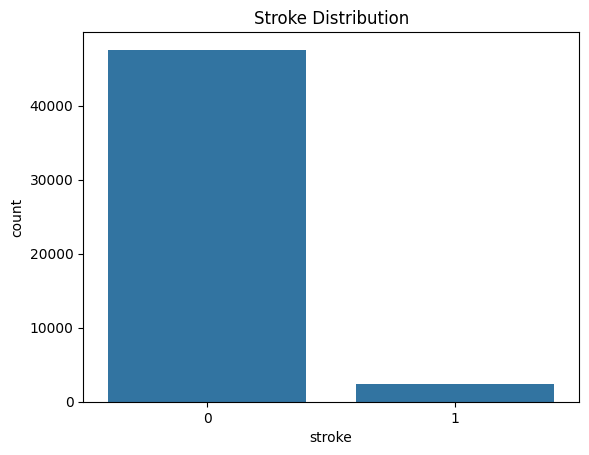

In [138]:
sns.countplot(x='stroke', data=data)
plt.title('Stroke Distribution')
plt.show()

C:\Users\mkhal\AppData\Local\Temp\ipykernel_21468\1339587897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='gender', palette='Set2')


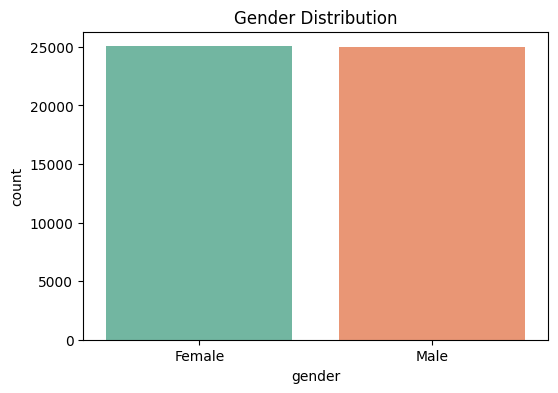

In [139]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()

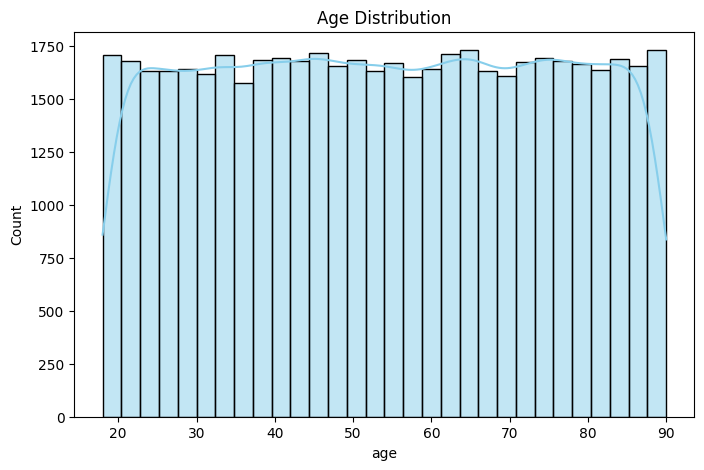

In [140]:
plt.figure(figsize=(8,5))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()

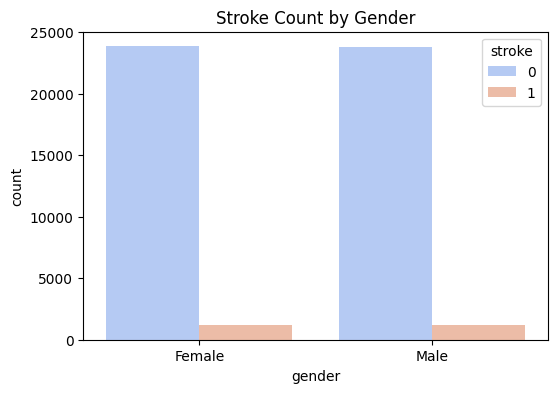

In [141]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='gender', hue='stroke', palette='coolwarm')
plt.title("Stroke Count by Gender")
plt.show()

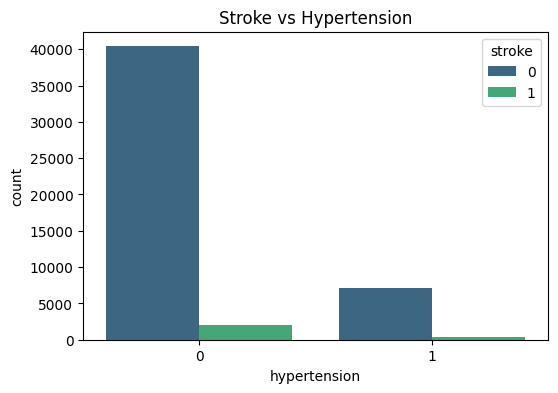

In [142]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='hypertension', hue='stroke', palette='viridis')
plt.title("Stroke vs Hypertension")
plt.show()

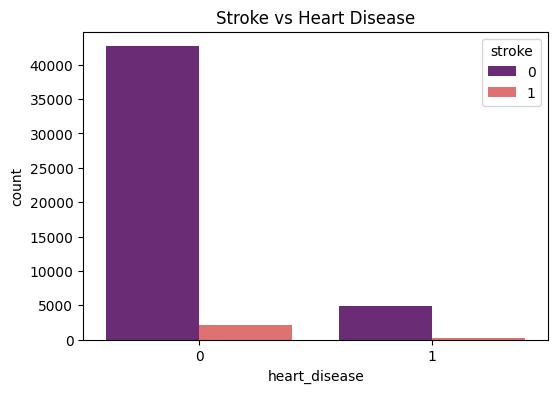

In [143]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='heart_disease', hue='stroke', palette='magma')
plt.title("Stroke vs Heart Disease")
plt.show()

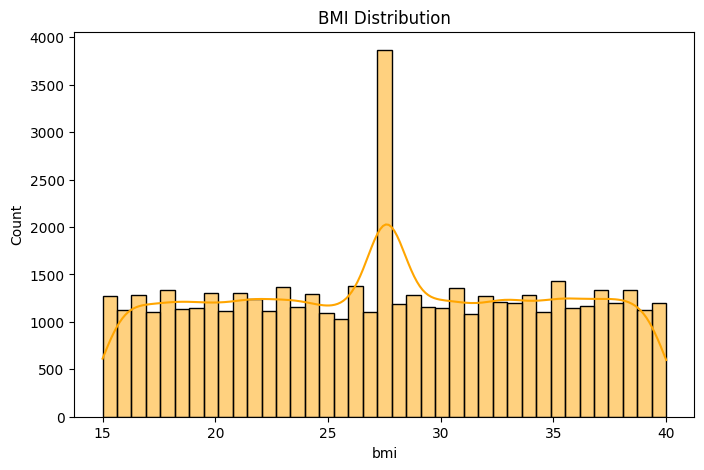

In [144]:
plt.figure(figsize=(8,5))
sns.histplot(data['bmi'].dropna(), kde=True, color='orange')
plt.title("BMI Distribution")
plt.show()

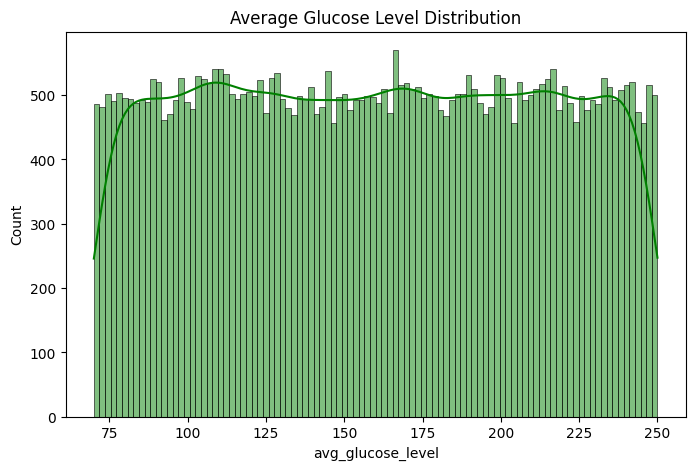

In [145]:
plt.figure(figsize=(8,5))
sns.histplot(data['avg_glucose_level'], bins=100, kde=True, color='green')
plt.title("Average Glucose Level Distribution")
plt.show()

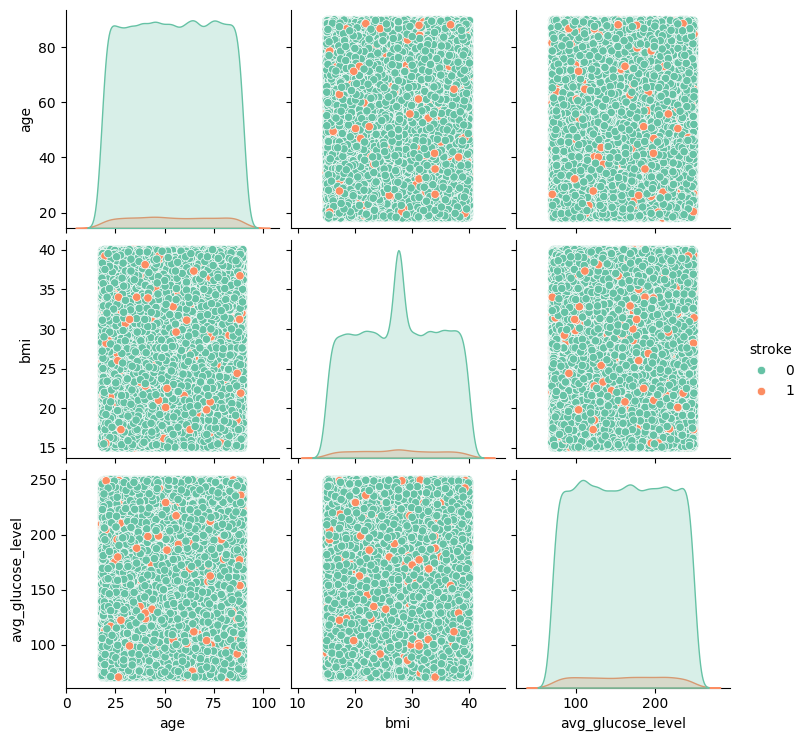

In [146]:
sns.pairplot(data, hue='stroke', vars=['age','bmi','avg_glucose_level'], palette='Set2')
plt.show();

In [147]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Data Encoding

### Over Sampling

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler

In [149]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])  
data['ever_married'] = le.fit_transform(data['ever_married'])
data.drop('id', axis=1, inplace=True)
data = pd.get_dummies(data, columns=['gender','ever_married','work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [150]:
X = data.drop('stroke', axis=1)
y = data['stroke']
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

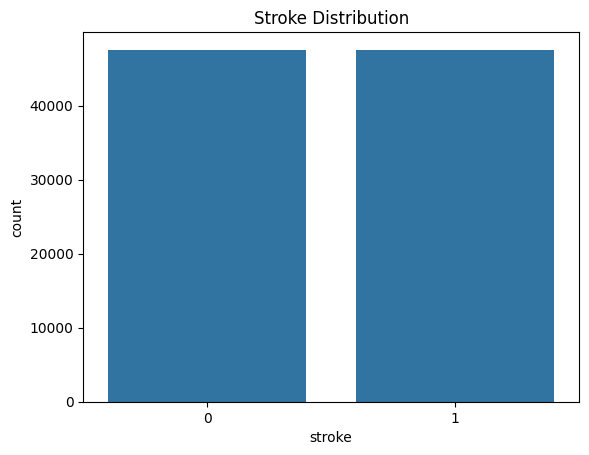

In [151]:
# Merge X_res and y_res
merged_df = pd.concat([X_res, y_res], axis=1)

sns.countplot(x='stroke', data=merged_df)
plt.title('Stroke Distribution')
plt.show()

In [152]:
X_res.shape

(95146, 14)

In [153]:
y_res.shape

(95146,)

In [154]:
scaler = StandardScaler()
data_Ctrl= y_res
data_sv = X_res#data.drop(['stroke'], axis='columns')
X_train, X_test, y_train, y_test = train_test_split(data_sv, data_Ctrl, test_size=0.20, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_train_scaled, columns=X_train.columns)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_1,ever_married_1,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.520554,-0.425580,-0.341963,-0.432170,-0.409565,1.000657,0.652570,-0.582225,-0.586554,-0.571990,1.004609,-0.571869,1.716416,-0.584491
1,0.764779,-0.425580,-0.341963,-0.426576,-0.338579,1.000657,0.652570,1.717549,-0.586554,-0.571990,-0.995412,-0.571869,-0.582609,1.710891
2,0.520554,2.349733,-0.341963,-0.086312,-0.636722,1.000657,0.652570,-0.582225,-0.586554,1.748282,-0.995412,-0.571869,-0.582609,-0.584491
3,-0.815501,2.349733,-0.341963,1.065457,0.342891,1.000657,0.652570,1.717549,-0.586554,-0.571990,1.004609,1.748653,-0.582609,-0.584491
4,-0.207333,-0.425580,-0.341963,-0.790952,0.612639,1.000657,0.652570,1.717549,-0.586554,-0.571990,1.004609,-0.571869,1.716416,-0.584491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76111,-0.738882,-0.425580,-0.341963,1.346117,-1.261402,-0.999343,0.652570,-0.582225,-0.586554,1.748282,-0.995412,-0.571869,1.716416,-0.584491
76112,-1.399726,-0.425580,-0.341963,1.030736,0.144129,1.000657,0.652570,1.717549,-0.586554,-0.571990,-0.995412,-0.571869,-0.582609,-0.584491
76113,-0.796347,-0.425580,-0.341963,-0.487145,-0.594130,1.000657,0.652570,-0.582225,-0.586554,1.748282,1.004609,-0.571869,-0.582609,1.710891
76114,-0.403671,2.349733,-0.341963,-0.571439,-1.105232,1.000657,-1.532403,-0.582225,1.704872,-0.571990,-0.995412,-0.571869,-0.582609,1.710891


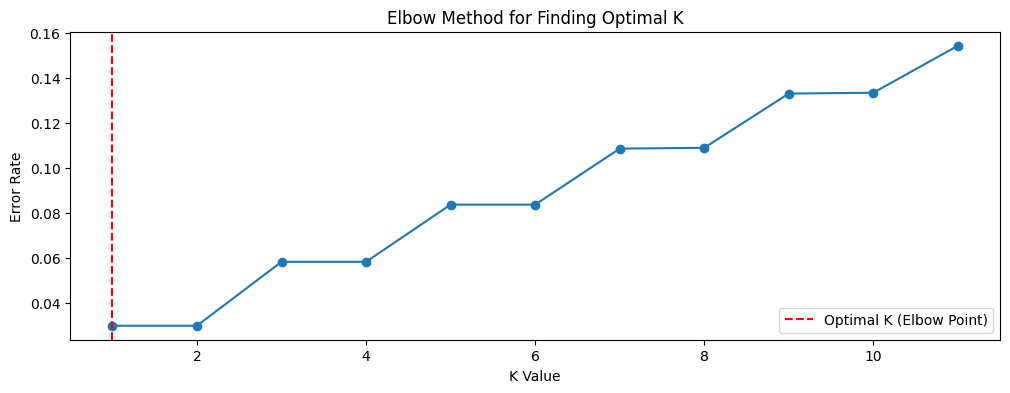

In [155]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = range(1, 12)
error_rates = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)
plt.figure(figsize=(12, 4))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
xcalc=error_rates.index(min(error_rates))+1
plt.axvline(x=xcalc, linestyle='--', color='red', label="Optimal K (Elbow Point)")
plt.legend()
plt.show()

In [156]:
KNN = KNeighborsClassifier(n_neighbors=xcalc)
KNN.fit(X_train_scaled,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## KNN Calassifier

In [157]:
y_pred = KNN.predict(X_test_scaled)

print(100*accuracy_score(y_test,y_pred))

97.21492380451919


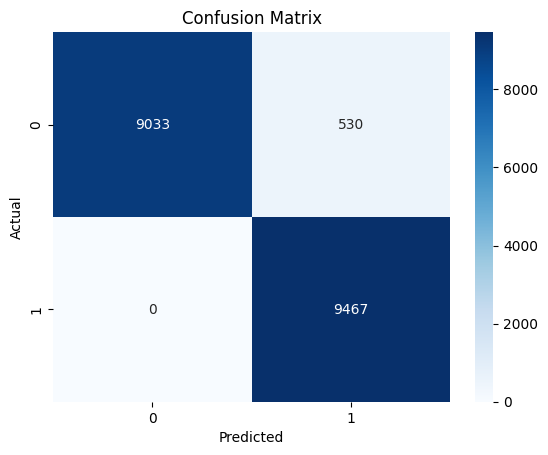

In [158]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random forest classifier

In [159]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train_scaled, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [160]:
rf_model.predict_proba(X_test_scaled)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.98666667, 0.01333333],
       [0.        , 1.        ],
       [0.96666667, 0.03333333]], shape=(19030, 2))

In [161]:
y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9981607987388335


In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9563
           1       1.00      1.00      1.00      9467

    accuracy                           1.00     19030
   macro avg       1.00      1.00      1.00     19030
weighted avg       1.00      1.00      1.00     19030



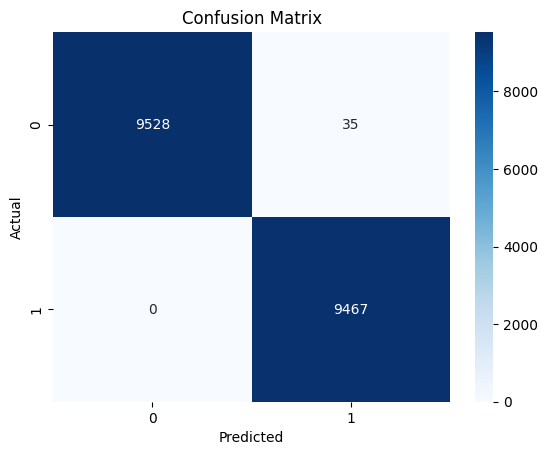

In [163]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [164]:
from sklearn.linear_model import LogisticRegression


## Logistic Regression

In [165]:
lg_reg = LogisticRegression(random_state=42).fit(X_train_scaled, y_train)
lg_reg.predict(X_test_scaled)
lg_reg.predict_proba(X_test_scaled)
lg_reg.score(X_test_scaled, y_test)

0.5170782974251182

## Decision Tree Calssifier

In [166]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_train_scaled, y_train)
y_pred = DTC.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9694167104571729


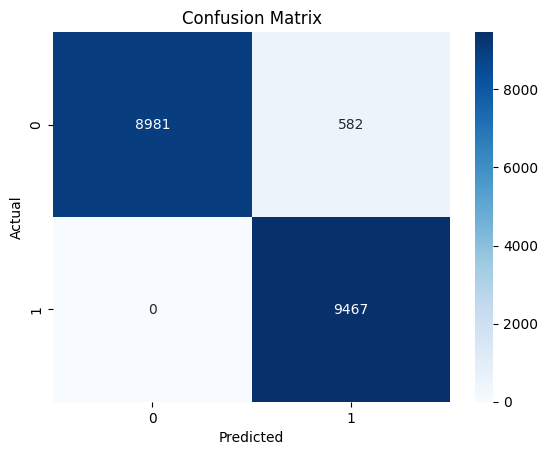

In [167]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Gradient Boosting Classifier

In [168]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train_scaled, y_train)
y_pred = gb_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6173935890698896


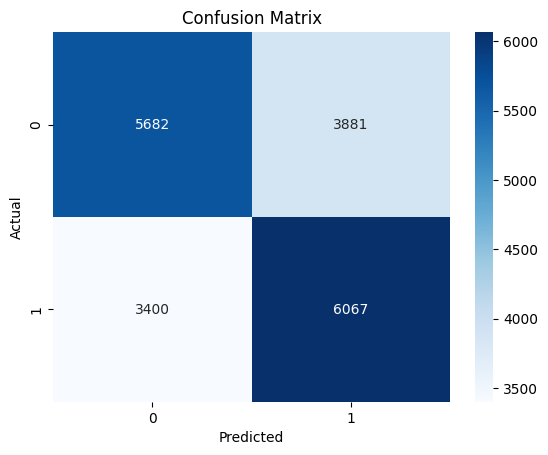

In [169]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## SVM Classifier

In [ ]:
# create a SVM classifiere
# from sklearn.svm import SVC
# clf = SVC(kernel="rbf", C=1.0, gamma="scale")

# # Fit the model
# clf.fit(X_train_scaled, y_train)

# # Predict
# y_pred = clf.predict(X_test_scaled)

# # Evaluate accuracy
# acc = accuracy_score(y_test, y_pred)
# print("Accuracy:", acc)

Accuracy: 0.6514450867052023


## XGBoost Classifier

In [171]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=150,           # Same as n_estimators in your RF model
    learning_rate=0.1,          # Standard default value
    random_state=42,
    eval_metric='logloss'       # Standard evaluation metric
)
xgb_model.fit(X_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [172]:
y_pred_xgb = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Overall Accuracy: {accuracy:.4f}")

Overall Accuracy: 0.8156


In [173]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Stroke (0)', 'Stroke (1)']))


Classification Report:
               precision    recall  f1-score   support

No Stroke (0)       0.85      0.77      0.81      9563
   Stroke (1)       0.79      0.86      0.82      9467

     accuracy                           0.82     19030
    macro avg       0.82      0.82      0.82     19030
 weighted avg       0.82      0.82      0.82     19030



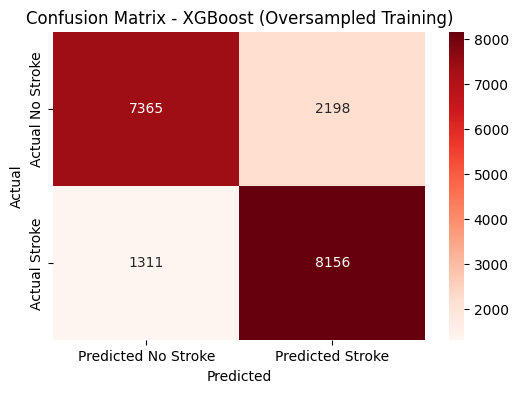

In [174]:
# 5. Visualize Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds',
    xticklabels=['Predicted No Stroke', 'Predicted Stroke'],
    yticklabels=['Actual No Stroke', 'Actual Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost (Oversampled Training)')
plt.show()